# Predicting the Credit Card Spend and Identifying the Key Performance    Indicators that drive the Spend

In [ ]:
import numpy as np
import pandas as pd
#!pip install pandas_profiling
import pandas_profiling

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.backends.backend_pdf import PdfPages
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing data
data = pd.read_csv("C:/Alabs/Alabs Qns Py/FINAL ASSIGNMENTS/Final Proj Qns and Ans/Final proj qns/Qn 1/Data Set.csv")

In [ ]:
data.dtypes

custid                object
region               float64
townsize              object
gender               float64
age                  float64
agecat               float64
birthmonth            object
ed                   float64
edcat                float64
jobcat               float64
union                float64
employ               float64
empcat               float64
retire               float64
income               float64
lninc                float64
inccat               float64
debtinc              float64
creddebt             float64
lncreddebt            object
othdebt              float64
lnothdebt             object
default              float64
jobsat               float64
marital              float64
spoused              float64
spousedcat           float64
reside               float64
pets                 float64
pets_cats            float64
pets_dogs            float64
pets_birds           float64
pets_reptiles        float64
pets_small           float64
pets_saltfish 

In [ ]:
#These will help you to see all records as well as columns in the data set
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
data

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,1.0,0.0,1.0,0.0,31.0,3.43,2.0,11.1,1.20,0.18,2.24,0.81,1.0,1.0,0.0,-1.0,-1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,0.0,14.3,1.0,0.0,0.0,8.0,4.0,22.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,6.0,1.0,0.0,1.0,3.0,1.0,1.0,0.0,2.0,2.0,5.0,3.0,1.0,0.0,3.0,2.0,81.66,67.80,0.0,3.0,5.0,1.0,6.50,1.87,34.40,3.54,1.0,29.0,3.37,161.05,5.08,1.0,29.50,3.38,126.10,4.84,1.0,14.25,2.66,60.00,4.09,0.0,0.00,#NULL!,0.00,#NULL!,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,13.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,0.0,0.0,1.0,0.0,15.0,2.71,1.0,18.6,1.22,0.20,1.57,0.45,1.0,1.0,0.0,-1.0,-1.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,6.8,1.0,0.0,0.0,1.0,1.0,29.00,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,9.0,4.0,1.0,0.0,0.0,2.0,4.0,1.0,0.0,4.0,2.0,4.0,1.0,3.0,0.0,4.0,2.0,42.60,34.94,1.0,1.0,39.0,0.0,8.90,2.19,330.60,5.80,0.0,0.0,#NULL!,0.00,#NULL!,1.0,54.85,4.00,1975.00,7.59,1.0,16.00,2.77,610.00,6.41,1.0,45.65,3.82,1683.55,7.43,1.0,1.0,1.0,4.0,1.0,0.0,1.0,0.0,1.0,1.0,18.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,0.0,16.0,5.0,0.0,35.0,3.56,2.0,9.9,0.93,-0.07,2.54,0.93,0.0,4.0,1.0,13.0,2.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,30.0,5.0,3.0,1.0,1.0,18.8,1.0,0.0,1.0,4.0,3.0,24.00,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,1.0,0.0,0.0,2.0,1.0,4.0,0.0,35.0,5.0,4.0,1.0,3.0,0.0,25.0,5.0,184.22,175.75,0.0,3.0,65.0,0.0,28.40,3.35,1858.35,7.53,0.0,0.0,#NULL!,0.00,#NULL!,0.0,0.00,#NULL!,0.00,#NULL!,1.0,23.00,3.14,1410.00,7.25,0.0,0.00,#NULL!,0.00,#NULL!,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,0.0,0.0,1.0,0.0,20.0,3.00,1.0,5.7,0.02,-3.78,1.12,0.11,1.0,2.0,1.0,18.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,1.0,8.7,1.0,0.0,1.0,1.0,1.0,38.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,0.0,0.0,0.0,2.0,1.0,4.0,0.0,5.0,2.0,3.0,2.0,4.0,0.0,5.0,2.0,340.99,18.42,1.0,1.0,36.0,0.0,6.00,1.79,199.45,5.30,0.0,0.0,#NULL!,0.00,#NULL!,0.0,0.00,#NULL!,0.00,#NULL!,1.0,21.00,3.04,685.00,6.53,0.0,0.00,#NULL!,0.00,#NULL!,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,26.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,0.0,1.0,1.0,0.0,23.0,3.14,1.0,1.7,0.21,-1.54,0.18,-1.74,0.0,1.0,1.0,13.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,1.0,0.0,1.0,10.6,1.0,0.0,1.0,6.0,3.0,32.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.0,4.0,0.0,0.0,0.0,4.0,2.0,1.0,0.0,8.0,3.0,1.0,3.0,2.0,0.0,9.0,3.0,255.10,252.73,1.0,3.0,21.0,0.0,3.05,1.12,74.10,4.31,1.0,16.5,2.80,387.70,5.96,0.0,0.00,#NULL!,0.00,#NULL!,1.0,17.25,2.85,360.

In [ ]:
#Checking Missing values
sum(data.isnull().sum())

0

In [ ]:
#Checking Data Dimension
data.shape

(5000, 130)

## Data Preparation

### Removing the log variables and categorical features which are numerical features

In [ ]:
data = data.drop(['lninc','lncreddebt','lnothdebt','lnlongmon','lnlongten','lntollmon','lntollten','lnequipmon','lnequipten','lncardmon','lncardten','lnwiremon','lnwireten','townsize','agecat','employ','address','cars','cardtenure','card2tenure'], axis = 1)

In [ ]:
data.head()

,custid,region,gender,age,birthmonth,ed,edcat,jobcat,union,empcat,retire,income,inccat,debtinc,creddebt,othdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,addresscat,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,longten,tollfree,tollmon,tollten,equip,equipmon,equipten,callcard,cardmon,cardten,wireless,wiremon,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,1.0,20.0,September,15.0,3.0,1.0,1.0,1.0,0.0,31.0,2.0,11.1,1.20,2.24,1.0,1.0,0.0,-1.0,-1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,14.3,1.0,0.0,0.0,8.0,4.0,22.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,6.0,1.0,0.0,1.0,3.0,1.0,1.0,0.0,2.0,5.0,3.0,1.0,0.0,2.0,81.66,67.80,0.0,3.0,5.0,1.0,6.50,34.40,1.0,29.0,161.05,1.0,29.50,126.1,1.0,14.25,60.00,0.0,0.00,0.00,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,13.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,0.0,22.0,May,17.0,4.0,2.0,0.0,1.0,0.0,15.0,1.0,18.6,1.22,1.57,1.0,1.0,0.0,-1.0,-1.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,3.0,1.0,1.0,1.0,6.8,1.0,0.0,0.0,1.0,1.0,29.00,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,9.0,4.0,1.0,0.0,0.0,2.0,4.0,1.0,0.0,2.0,4.0,1.0,3.0,0.0,2.0,42.60,34.94,1.0,1.0,39.0,0.0,8.90,330.60,0.0,0.0,0.00,1.0,54.85,1975.0,1.0,16.00,610.00,1.0,45.65,1683.55,1.0,1.0,1.0,4.0,1.0,0.0,1.0,0.0,1.0,1.0,18.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,1.0,67.0,June,14.0,2.0,2.0,0.0,5.0,0.0,35.0,2.0,9.9,0.93,2.54,0.0,4.0,1.0,13.0,2.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,1.0,18.8,1.0,0.0,1.0,4.0,3.0,24.00,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,1.0,0.0,0.0,2.0,1.0,4.0,0.0,5.0,4.0,1.0,3.0,0.0,5.0,184.22,175.75,0.0,3.0,65.0,0.0,28.40,1858.35,0.0,0.0,0.00,0.0,0.00,0.0,1.0,23.00,1410.00,0.0,0.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,0.0,23.0,May,16.0,3.0,2.0,0.0,1.0,0.0,20.0,1.0,5.7,0.02,1.12,1.0,2.0,1.0,18.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,1.0,1.0,8.7,1.0,0.0,1.0,1.0,1.0,38.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,0.0,0.0,0.0,2.0,1.0,4.0,0.0,2.0,3.0,2.0,4.0,0.0,2.0,340.99,18.42,1.0,1.0,36.0,0.0,6.00,199.45,0.0,0.0,0.00,0.0,0.00,0.0,1.0,21.00,685.00,0.0,0.00,0.00,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,26.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,0.0,26.0,July,16.0,3.0,2.0,0.0,1.0,0.0,23.0,1.0,1.7,0.21,0.18,0.0,1.0,1.0,13.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,10.6,1.0,0.0,1.0,6.0,3.0,32.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.0,4.0,0.0,0.0,0.0,4.0,2.0,1.0,0.0,3.0,1.0,3.0,2.0,0.0,3.0,255.10,252.73,1.0,3.0,21.0,0.0,3.05,74.10,1.0,16.5,387.70,0.0,0.00,0.0,1.0,17.25,360.00,1.0,19.05,410.80,0.0,1.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,1.0,27.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#Seperating numerical columns
#Continuous variables
num_vars = ["age","ed","income","debtinc","creddebt","othdebt","spoused","pets","carvalue","commute","commutetime","cardspent","card2spent","tenure","longmon","longten","tollmon","tollten","equipmon","equipten","cardmon","cardten","wiremon","wireten","hourstv"]
data_num = data[num_vars]

In [ ]:
data_num.shape

(5000, 25)

In [ ]:
data_num.dtypes

age            float64
ed             float64
income         float64
debtinc        float64
creddebt       float64
othdebt        float64
spoused        float64
pets           float64
carvalue       float64
commute        float64
commutetime     object
cardspent      float64
card2spent     float64
tenure         float64
longmon        float64
longten         object
tollmon        float64
tollten        float64
equipmon       float64
equipten       float64
cardmon        float64
cardten         object
wiremon        float64
wireten        float64
hourstv        float64
dtype: object

In [ ]:
#Converting all the continuous variable columns to float and removing the null value rows
data_num["commutetime"] = pd.to_numeric(data_num["commutetime"], errors = "coerce")
data_num["longten"] = pd.to_numeric(data_num["longten"], errors = "coerce")
data_num["cardten"] = pd.to_numeric(data_num["cardten"], errors = "coerce")

data_num = data_num.dropna()
data_num.shape

(4995, 25)

### Creating variable "Total Spend" and dropping columns "Cardspent" and "Card2Spent"

In [ ]:
data_num['TotalSpend'] = data_num['cardspent'] + data_num['card2spent']
data_num = data_num.drop(['cardspent','card2spent'], axis = 1)
data_num.shape

(4995, 24)

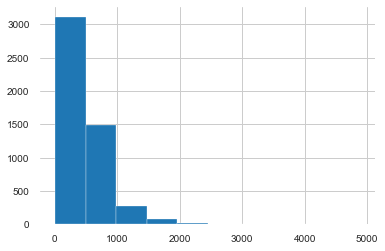

In [ ]:
#Checking Normal Distribution
data_num.TotalSpend.hist()

In [ ]:
#Applying transformation for target variable to make it into Near normal
data_num['log_Total_Spend'] = np.log(data_num.TotalSpend)

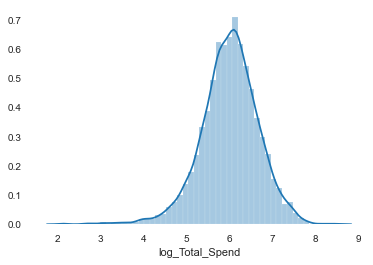

In [ ]:
#Plotting transformed dependent variable
sns.distplot(data_num.log_Total_Spend)

In [ ]:
#Creating summary for numerical columns
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [ ]:
#Implementing user defined summary function
data_num.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,4995.0,0.0,2.349580e+05,47.038639,47.000000,17.762503,3.155065e+02,0.377615,18.000000,18.000000,20.000000,23.000000,31.000000,47.000000,62.00000,72.000000,76.000000,79.000000,79.000000
ed,4995.0,0.0,7.264400e+04,14.543343,14.000000,3.281645,1.076920e+01,0.225646,6.000000,8.000000,9.000000,10.000000,12.000000,14.000000,17.00000,19.000000,20.000000,21.000000,23.000000
income,4995.0,0.0,2.736060e+05,54.775976,38.000000,55.387300,3.067753e+03,1.011160,9.000000,9.000000,13.000000,16.000000,24.000000,38.000000,67.00000,109.000000,147.000000,272.060000,1073.000000
debtinc,4995.0,0.0,4.970590e+04,9.951131,8.800000,6.397989,4.093426e+01,0.642941,0.000000,0.700000,1.900000,2.800000,5.100000,8.800000,13.60000,18.600000,22.200000,29.200000,43.100000
creddebt,4995.0,0.0,9.282340e+03,1.858326,0.930000,3.417282,1.167782e+01,1.838903,0.000000,0.030000,0.100000,0.180000,0.390000,0.930000,2.06000,4.300000,6.379000,14.282400,109.070000
othdebt,4995.0,0.0,1.825886e+04,3.655427,2.100000,5.397555,2.913361e+01,1.476587,0.000000,0.110000,0.290000,0.460000,0.980000,2.100000,4.31000,8.060000,11.822000,24.070800,141.460000
spoused,4995.0,0.0,3.054300e+04,6.114715,-1.000000,7.744535,5.997783e+01,1.266541,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,14.00000,16.000000,18.000000,20.000000,24.000000
pets,4995.0,0.0,1.531300e+04,3.065666,2.000000,3.412692,1.164647e+01,1.113198,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.00000,8.000000,10.000000,13.000000,21.000000
carvalue,4995.0,0.0,1.161325e+05,23.249750,17.000000,21.234984,4.509245e+02,0.913342,-1.000000,-1.000000,-1.000000,2.540000,9.300000,17.000000,31.10000,52.960000,72.000000,92.006000,99.600000
commute,4995.0,0.0,1.496300e+04,2.995596,1.000000,2.743613,7.527414e+00,0.915882,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000,8.000000,8.000000,10.000000,10.000000


In [ ]:
data_num.columns

Index(['age', 'ed', 'income', 'debtinc', 'creddebt', 'othdebt', 'spoused', 'pets', 'carvalue', 'commute', 'commutetime', 'tenure', 'longmon', 'longten', 'tollmon', 'tollten', 'equipmon', 'equipten', 'cardmon', 'cardten', 'wiremon', 'wireten', 'hourstv', 'TotalSpend', 'log_Total_Spend'], dtype='object')

In [ ]:
#Outlier Treatment
# continuous variables
data_num = data_num.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

In [ ]:
#Categorical Variables
data_cat = data.loc[:,(data.columns.difference(["age","ed","income","debtinc","creddebt","othdebt","spoused","pets","carvalue","commute","commutetime","cardspent","card2spent","tenure","longmon","longten","tollmon","tollten","equipmon","equipten","cardmon","cardten","wiremon","wireten","hourstv"]))]
data_cat.head()

,active,addresscat,bfast,birthmonth,callcard,callid,callwait,carbought,carbuy,carcatvalue,card,card2,card2benefit,card2fee,card2tenurecat,card2type,cardbenefit,cardfee,cardtenurecat,cardtype,carown,cartype,churn,commutebike,commutebus,commutecar,commutecarpool,commutecat,commutemotorcycle,commutenonmotor,commutepublic,commuterail,commutewalk,confer,custid,default,ebill,edcat,empcat,equip,forward,gender,homeown,hometype,inccat,internet,jobcat,jobsat,marital,multline,news,owncd,owndvd,ownfax,owngame,ownipod,ownpc,ownpda,owntv,ownvcr,pager,pets_birds,pets_cats,pets_dogs,pets_freshfish,pets_reptiles,pets_saltfish,pets_small,polcontrib,polparty,polview,reason,region,reside,response_01,response_02,response_03,retire,spousedcat,telecommute,tollfree,union,voice,vote,wireless
0,0.0,1.0,3.0,September,1.0,0.0,1.0,0.0,0.0,1.0,3.0,5.0,1.0,0.0,2.0,3.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,0.0,1.0,1.0,3964-QJWTRG-NPN,1.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,9.0,1.0,3.0,0.0,1.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0,1.0,0.0
1,1.0,1.0,1.0,May,1.0,1.0,0.0,0.0,0.0,1.0,2.0,4.0,3.0,0.0,2.0,1.0,1.0,0.0,2.0,4.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0648-AIPJSP-UVM,1.0,1.0,4.0,1.0,1.0,1.0,0.0,1.0,3.0,1.0,4.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,4.0,9.0,5.0,2.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,5.0,3.0,June,1.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,3.0,0.0,5.0,1.0,4.0,0.0,5.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,5195-TLUDJE-HVO,0.0,0.0,2.0,5.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2.0,1.0,May,1.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0,4.0,0.0,2.0,2.0,4.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4459-VLPQUH-3OL,1.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,9.0,4.0,5.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2.0,3.0,July,1.0,1.0,1.0,0.0,1.0,1.0,4.0,1.0,2.0,0.0,3.0,3.0,1.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,8158-SMTQFB-CNO,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,9.0,2.0,4.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [ ]:
data_cat = data[['gender','jobcat', 'union','retire','default','marital','homeown','hometype','carown','cartype','carcatvalue','carbought','carbuy',
                 'commutecat','reason','polview','card','cardtype','cardbenefit','cardfee','cardtenurecat','card2','card2type','card2benefit','card2fee',
                 'card2tenurecat','bfast','internet']]

# for c_feature in categorical_features
for c_feature in ['gender','jobcat', 'union','retire','default','marital','homeown','hometype','carown','cartype','carcatvalue','carbought','carbuy',
                 'commutecat','reason','polview','card','cardtype','cardbenefit','cardfee','cardtenurecat','card2','card2type','card2benefit','card2fee',
                 'card2tenurecat','bfast','internet']:
    data_cat[c_feature] = data_cat[c_feature].astype('category')
    data_cat = create_dummies(data_cat, c_feature)

    
    
    
    
data_cat.head()

,gender_1.0,jobcat_2.0,jobcat_3.0,jobcat_4.0,jobcat_5.0,jobcat_6.0,union_1.0,retire_1.0,default_1.0,marital_1.0,homeown_1.0,hometype_2.0,hometype_3.0,hometype_4.0,carown_0.0,carown_1.0,cartype_0.0,cartype_1.0,carcatvalue_1.0,carcatvalue_2.0,carcatvalue_3.0,carbought_0.0,carbought_1.0,carbuy_1.0,commutecat_2.0,commutecat_3.0,commutecat_4.0,commutecat_5.0,reason_2.0,reason_3.0,reason_4.0,reason_9.0,polview_2.0,polview_3.0,polview_4.0,polview_5.0,polview_6.0,polview_7.0,card_2.0,card_3.0,card_4.0,card_5.0,cardtype_2.0,cardtype_3.0,cardtype_4.0,cardbenefit_2.0,cardbenefit_3.0,cardbenefit_4.0,cardfee_1.0,cardtenurecat_2.0,cardtenurecat_3.0,cardtenurecat_4.0,cardtenurecat_5.0,card2_2.0,card2_3.0,card2_4.0,card2_5.0,card2type_2.0,card2type_3.0,card2type_4.0,card2benefit_2.0,card2benefit_3.0,card2benefit_4.0,card2fee_1.0,card2tenurecat_2.0,card2tenurecat_3.0,card2tenurecat_4.0,card2tenurecat_5.0,bfast_2.0,bfast_3.0,internet_1.0,internet_2.0,internet_3.0,internet_4.0
0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0


In [ ]:
data_cat = data_cat.rename(columns=lambda x: x.replace(".0", ''))

In [ ]:
#Combining both categorical and Continuous data
data_final = pd.concat([data_num,data_cat],axis=1)
#Removing Null 
data_final = data_final.dropna()
data_final

,age,ed,income,debtinc,creddebt,othdebt,spoused,pets,carvalue,commute,commutetime,tenure,longmon,longten,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv,TotalSpend,log_Total_Spend,gender_1,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,union_1,retire_1,default_1,marital_1,homeown_1,hometype_2,hometype_3,hometype_4,carown_0,carown_1,cartype_0,cartype_1,carcatvalue_1,carcatvalue_2,carcatvalue_3,carbought_0,carbought_1,carbuy_1,commutecat_2,commutecat_3,commutecat_4,commutecat_5,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,card_2,card_3,card_4,card_5,cardtype_2,cardtype_3,cardtype_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardfee_1,cardtenurecat_2,cardtenurecat_3,cardtenurecat_4,cardtenurecat_5,card2_2,card2_3,card2_4,card2_5,card2type_2,card2type_3,card2type_4,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_1,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,bfast_2,bfast_3,internet_1,internet_2,internet_3,internet_4
0,20.0,15.0,31.0,11.1,1.20,2.24,-1.0,0.0,14.300,8.0,22.0,5.0,6.50,34.40,29.0,161.05,29.50,126.10,14.25,60.0,0.00,0.00,13.0,149.46,5.007029,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,22.0,17.0,15.0,18.6,1.22,1.57,-1.0,6.0,6.800,1.0,29.0,39.0,8.90,330.60,0.0,0.00,54.85,1975.00,16.00,610.0,45.65,1683.55,18.0,77.54,4.350794,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,67.0,14.0,35.0,9.9,0.93,2.54,13.0,3.0,18.800,4.0,24.0,65.0,28.40,1858.35,0.0,0.00,0.00,0.00,23.00,1410.0,0.00,0.00,21.0,359.97,5.886021,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
3,23.0,16.0,20.0,5.7,0.03,1.12,18.0,0.0,8.700,1.0,38.0,36.0,6.00,199.45,0.0,0.00,0.00,0.00,21.00,685.0,0.00,0.00,26.0,359.41,5.884464,0,1,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,26.0,16.0,23.0,1.7,0.21,0.18,13.0,0.0,10.600,6.0,32.0,21.0,3.05,74.10,16.5,387.70,0.00,0.00,17.25,360.0,19.05,410.80,27.0,507.83,6.230147,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,68.0,10.0,196.0,8.0,7.93,7.75,-1.0,4.0,64.500,5.0,21.0,69.0,34.10,2405.90,0.0,0.00,0.00,0.00,21.75,1565.0,0.00,0.00,19.0,1425.67,7.262397,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
4996,51.0,14.0,83.0,15.0,3.34,9.11,-1.0,1.0,40.000,4.0,26.0,30.0,10.40,289.00,36.5,1157.20,0.00,0.00,26.25,800.0,27.90,757.35,14.0,366.35,5.903589,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4997,75.0,17.0,108.0,10.8,3.56,8.11,-1.0,0.0,53.600,1.0,32.0,72.0,29.40,2109.25,44.0,3322.50,0.00,0.00,15.25,1070.0,0.00,0.00,16.0,1527.75,7.331551,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
4998,47.0,19.0,189.0,10.8,5.02,15.39,15.0,0.0,92.006,1.0,13.0,37.0,7.95,282.70,0.0,0.00,29.55,1032.85,9.50,345.0,0.00,0.00,24.0,752.95,6.623999,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1

## Linear Regression

In [ ]:
# correlation matrix
corrm = data_final.corr()
corrm

,age,ed,income,debtinc,creddebt,othdebt,spoused,pets,carvalue,commute,commutetime,tenure,longmon,longten,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv,TotalSpend,log_Total_Spend,gender_1,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,union_1,retire_1,default_1,marital_1,homeown_1,hometype_2,hometype_3,hometype_4,carown_0,carown_1,cartype_0,cartype_1,carcatvalue_1,carcatvalue_2,carcatvalue_3,carbought_0,carbought_1,carbuy_1,commutecat_2,commutecat_3,commutecat_4,commutecat_5,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,card_2,card_3,card_4,card_5,cardtype_2,cardtype_3,cardtype_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardfee_1,cardtenurecat_2,cardtenurecat_3,cardtenurecat_4,cardtenurecat_5,card2_2,card2_3,card2_4,card2_5,card2type_2,card2type_3,card2type_4,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_1,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,bfast_2,bfast_3,internet_1,internet_2,internet_3,internet_4
age,1.000000,-0.094803,0.207920,0.039422,0.142025,0.154274,-0.003323,0.025910,0.175394,0.000538,-0.056240,0.611752,0.468869,4.999517e-01,0.106399,0.263158,-0.104915,0.091255,0.294998,0.463451,-0.025844,0.108504,-0.027052,0.031720,0.007482,-0.010780,-0.028676,0.021897,-0.022768,-0.005720,0.049042,0.011827,0.567449,-0.393078,0.002511,-0.019083,0.009267,-0.038213,0.007159,0.153755,-0.125008,-0.007519,0.010722,-0.160098,0.031892,0.181227,-0.004156,0.007781,0.018452,0.018869,0.009233,-0.021458,0.021920,0.017563,0.016428,-0.000004,-2.067860e-02,0.000991,-0.010241,-0.005824,-0.001162,0.018712,0.027442,0.000181,0.010518,0.022833,-0.036023,-0.002477,-0.002169,-0.000562,0.001297,-0.001712,0.008687,0.003630,-0.380878,-0.205006,-0.055722,0.633277,-0.000134,-0.024834,0.007677,0.005418,-0.008355,0.003806,0.032356,-0.002994,0.000655,-0.011481,0.000516,-0.376767,-0.149734,0.036331,0.583297,0.571415,-0.178609,-0.019382,-0.048377,-0.049379,-0.076916
ed,-0.094803,1.000000,0.186237,0.014234,0.122134,0.135601,0.114129,0.030214,0.157794,0.010802,-0.008422,-0.095594,-0.097404,-1.038375e-01,0.018241,-0.013185,0.448342,0.343695,-0.040055,-0.080209,0.345907,0.264699,-0.009511,0.101013,0.098157,-0.001177,0.023282,-0.039736,-0.015448,-0.019299,-0.046445,0.000667,-0.092842,0.111141,-0.021423,0.050679,-0.042847,0.035783,0.014111,-0.074794,0.061027,-0.021541,0.020249,-0.141521,0.056624,0.121533,-0.003014,0.001744,-0.002745,0.008737,-0.010904,0.020877,-0.000830,-0.005548,0.011603,-0.012126,3.971928e-03,0.038889,0.025749,0.035394,-0.029617,-0.061595,-0.064467,-0.119976,-0.115816,0.187241,-0.149457,-0.014468,0.019811,-0.022833,0.023127,-0.022413,-0.005294,-0.021997,0.036593,0.057569,0.051421,-0.086733,-0.033615,-0.033131,0.074804,-0.155135,-0.016600,0.015945,-0.024193,0.000264,-0.026728,0.007614,-0.019808,0.053895,0.062673,0.028903,-0.094925,-0.074056,0.044154,0.067268,0.153707,0.185111,0.288395
income,0.207920,0.186237,1.000000,0.012248,0.627557,0.696234,0.035727,0.007516,0.837374,-0.025542,-0.022714,0.236707,0.193649,1.992175e-01,0.239255,0.285646,0.111099,0.164050,0.164706,0.196933,0.214200,0.252672,0.055071,0.377340,0.356008,-0.002254,-0.203935,0.077123,0.024469,0.053167,0.090317,0.007931,-0.260526,-0.016107,0.007870,0.143608,-0.135755,0.008806,-0.043331,-0.250602,0.222308,-0.051645,0.062987,-0.582086,0.050421,0.734757,-0.066271,0.081996,-0.010444,0.008366,-0.034108,-0.016074,0.004524,0.011392,0.000534,0.007470,-1.708962e-04,-0.033222,-0.024596,-0.028974,0.024097,0.056767,0.047578,-0.100541,-0.061337,0.144819,-0.083494,-0.018360,-0.000794,0.004465,0.026139,-0.006056,-0.020678,0.003890,-0.166361,-0.077896,0.013773,0.241974,-0.000855,-0.043052,0.034715,-0.084123,-0.020429,0.010973,-0.000450,0.010935,-0.017032,-0.002139,0.003196,-0.153418,-0.043960,0.027169,0.220223,0.069237,0.036108,0.027216,-0.012170,0.029845,0.056025
debtinc,0.039422,0.014234,0.012248,1.000000,0.463258,0.527526,-0.040848,-0.002694,0.014446,-0.010823,0.000767,0.019317,0.012622,1.4

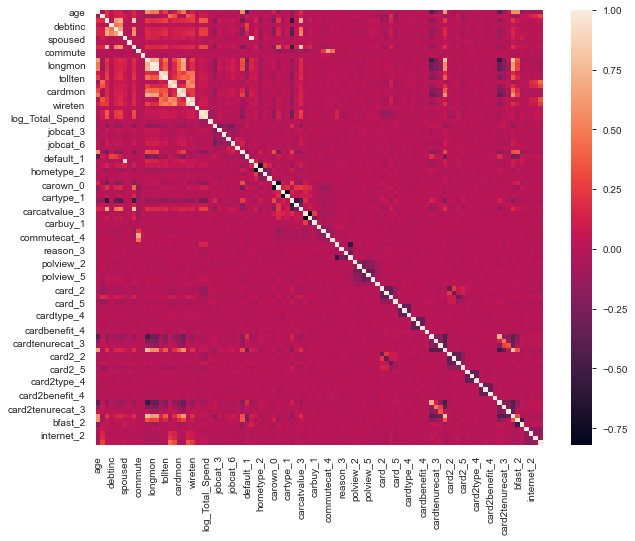

In [ ]:
# heatmap showing correlation
plt.figure(figsize = (10, 8))
sns.heatmap(data_final.corr())

In [ ]:
#Since not finding any correlation, not dropping any vars

## Model Building

In [ ]:
#Step1: divide the data into training and testing and separate out Y and X variables
train,test=train_test_split(data_final,test_size=0.3,random_state=123)

In [ ]:
print('No of obs in training: ', len(train), ' | ', 'No of obs in testing: ', len(test))

No of obs in training:  3496  |  No of obs in testing:  1499


In [ ]:
train.columns= [phrase.strip().replace('-', '') for phrase in train.columns]
train.columns

Index(['age', 'ed', 'income', 'debtinc', 'creddebt', 'othdebt', 'spoused', 'pets', 'carvalue', 'commute', 'commutetime', 'tenure', 'longmon', 'longten', 'tollmon', 'tollten', 'equipmon', 'equipten', 'cardmon', 'cardten', 'wiremon', 'wireten', 'hourstv', 'TotalSpend', 'log_Total_Spend', 'gender_1', 'jobcat_2', 'jobcat_3', 'jobcat_4', 'jobcat_5', 'jobcat_6', 'union_1', 'retire_1', 'default_1', 'marital_1', 'homeown_1', 'hometype_2', 'hometype_3', 'hometype_4', 'carown_0', 'carown_1', 'cartype_0', 'cartype_1', 'carcatvalue_1', 'carcatvalue_2', 'carcatvalue_3', 'carbought_0', 'carbought_1', 'carbuy_1', 'commutecat_2', 'commutecat_3', 'commutecat_4', 'commutecat_5', 'reason_2', 'reason_3', 'reason_4', 'reason_9', 'polview_2', 'polview_3', 'polview_4', 'polview_5', 'polview_6', 'polview_7', 'card_2', 'card_3', 'card_4', 'card_5', 'cardtype_2', 'cardtype_3', 'cardtype_4', 'cardbenefit_2', 'cardbenefit_3', 'cardbenefit_4', 'cardfee_1', 'cardtenurecat_2', 'cardtenurecat_3', 'cardtenurecat_4',
 

In [ ]:
all_columns = "+".join(train.columns.difference( ['log_Total_Spend'] ))
print(all_columns)

TotalSpend+age+bfast_2+bfast_3+carbought_0+carbought_1+carbuy_1+carcatvalue_1+carcatvalue_2+carcatvalue_3+card2_2+card2_3+card2_4+card2_5+card2benefit_2+card2benefit_3+card2benefit_4+card2fee_1+card2tenurecat_2+card2tenurecat_3+card2tenurecat_4+card2tenurecat_5+card2type_2+card2type_3+card2type_4+card_2+card_3+card_4+card_5+cardbenefit_2+cardbenefit_3+cardbenefit_4+cardfee_1+cardmon+cardten+cardtenurecat_2+cardtenurecat_3+cardtenurecat_4+cardtenurecat_5+cardtype_2+cardtype_3+cardtype_4+carown_0+carown_1+cartype_0+cartype_1+carvalue+commute+commutecat_2+commutecat_3+commutecat_4+commutecat_5+commutetime+creddebt+debtinc+default_1+ed+equipmon+equipten+gender_1+homeown_1+hometype_2+hometype_3+hometype_4+hourstv+income+internet_1+internet_2+internet_3+internet_4+jobcat_2+jobcat_3+jobcat_4+jobcat_5+jobcat_6+longmon+longten+marital_1+othdebt+pets+polview_2+polview_3+polview_4+polview_5+polview_6+polview_7+reason_2+reason_3+reason_4+reason_9+retire_1+spoused+tenure+tollmon+tollten+union_1+wir

## OLS Model

In [ ]:
#Reducing least contributing variables
model_reg = sm.ols('log_Total_Spend~card2_2+card2_3+card2_4+card2_5+card2benefit_3+card2tenurecat_3+card_2+card_3+card_4+card_5+cardtenurecat_3+cardtype_2+cartype_0+debtinc+default_1+gender_1+hometype_3+internet_3+internet_4+othdebt+polview_7+reason_2+reason_9+retire_1+union_1',data = train).fit()

In [ ]:
model_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_Total_Spend   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     59.90
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          6.39e-248
Time:                        19:38:22   Log-Likelihood:                -2823.7
No. Observations:                3496   AIC:                             5699.
Df Residuals:                    3470   BIC:                             5859.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.7666      0.049    138.675      0.000       6.671       6.862
card2_2             -0.4067      0.030    -13.474      0.000      -0.466      -0.348
card2_3             -0.3877      0.030    -12.846      0.000      -0.447      -0.328
card2_4             -0.4366      0.033    -13.161      0.000      -0.502      -0.372
card2_5             -0.2973      0.043     -6.960      0.000      -0.381      -0.214
card2benefit_3      -0.0418      0.021     -1.958      0.050      -0.084    4.93e-05
card2tenurecat_3     0.0459      0.027      1.703      0.089      -0.007       0.099
card_2              -0.6164      0.030    -20.664      0.000      -0.675      -0.558
card_3              -0.6285      0.030    -20.965      0.000      -0.687      -0.570
card_4              -0.6667      0.031    -21.512      0.000      -0.727      -0.606
card_5              -0.5082      0.051    -10.048      0.000      -0.607      -0.409
cardtenurecat_3     -0.0832      0.029     -2.839      0.005      -0.141      -0.026
cardtype_2           0.0086      0.022      0.398      0.690      -0.034       0.051
cartype_0           -0.0078      0.019     -0.420      0.675      -0.044       0.029
debtinc             -0.0131      0.002     -7.111      0.000      -0.017      -0.009
default_1           -0.0178      0.024     -0.747      0.455      -0.065       0.029
gender_1            -0.0591      0.019     -3.191      0.001      -0.095      -0.023
hometype_3           0.0322      0.024      1.334      0.182      -0.015       0.079
internet_3           0.0660      0.029      2.298      0.022       0.010       0.122
internet_4           0.0403      0.029      1.381      0.167      -0.017       0.098
othdebt              0.0414      0.003     15.720      0.000       0.036       0.047
polview_7           -0.0995      0.070     -1.418      0.156      -0.237       0.038
reason_2             0.3999      0.045      8.974      0.000       0.313       0.487
reason_9             0.1310      0.029      4.587      0.000       0.075       0.187
retire_1            -0.2549      0.027     -9.283      0.000      -0.309      -0.201
union_1              0.0367      0.026      1.416      0.157      -0.014       0.088
==============================================================================
Omnibus:                       80.250   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.852
Skew:                          -0.365   Prob(JB):                     2.28e-19
Kurtosis:                       3.238   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF (Variance Inflation Factor): Check the multicollinieirity for all the variables in the model

In [ ]:
model_param='log_Total_Spend~card2_2+card2_3+card2_4+card2_5+card2benefit_3+card2tenurecat_3+card_2+card_3+card_4+card_5+cardtenurecat_3+cardtype_2+cartype_0+debtinc+default_1+gender_1+hometype_3+internet_3+internet_4+othdebt+polview_7+reason_2+reason_9+retire_1+union_1'
# import the packages for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# separate the Y and X variables
y, X = dmatrices(model_param, train, return_type = 'dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# display the output
vif.round(1)

,Features,VIF Factor
0,Intercept,28.1
1,card2_2,2.0
2,card2_3,2.1
3,card2_4,2.3
4,card2_5,1.4
5,card2benefit_3,1.0
6,card2tenurecat_3,1.3
7,card_2,2.0
8,card_3,1.9
9,card_4,2.2


In [ ]:
# Predicting the sales on the training data
train['pred_limit'] = np.exp(model_reg.predict(train))
train.head()

,age,ed,income,debtinc,creddebt,othdebt,spoused,pets,carvalue,commute,commutetime,tenure,longmon,longten,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv,TotalSpend,log_Total_Spend,gender_1,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,union_1,retire_1,default_1,marital_1,homeown_1,hometype_2,hometype_3,hometype_4,carown_0,carown_1,cartype_0,cartype_1,carcatvalue_1,carcatvalue_2,carcatvalue_3,carbought_0,carbought_1,carbuy_1,commutecat_2,commutecat_3,commutecat_4,commutecat_5,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,card_2,card_3,card_4,card_5,cardtype_2,cardtype_3,cardtype_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardfee_1,cardtenurecat_2,cardtenurecat_3,cardtenurecat_4,cardtenurecat_5,card2_2,card2_3,card2_4,card2_5,card2type_2,card2type_3,card2type_4,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_1,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,bfast_2,bfast_3,internet_1,internet_2,internet_3,internet_4,pred_limit
2249,23.0,14.0,25.00,4.3,0.36,0.7100,-1.0,1.0,11.200,5.0,28.0,39.0,8.70,319.90,0.00,0.00,25.9,1039.2,7.75,260.0,0.0,0.0,17.0,293.46,5.681741,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,389.022369
2428,23.0,8.0,16.00,4.7,0.13,0.6200,10.0,0.0,10.300,1.0,17.0,19.0,6.60,127.45,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,17.0,136.80,4.918520,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,367.201783
449,57.0,14.0,272.06,20.8,10.91,24.0708,15.0,6.0,92.006,4.0,24.0,72.0,43.10,3031.90,39.25,2765.00,0.0,0.0,56.00,3805.0,0.0,0.0,22.0,1191.39,7.082876,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,692.524569
4071,54.0,16.0,55.00,6.2,1.34,2.0700,17.0,0.0,28.500,1.0,13.0,50.0,19.90,941.85,25.00,1262.05,0.0,0.0,38.00,1825.0,0.0,0.0,20.0,528.88,6.270762,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,631.677431
3667,70.0,9.0,17.00,5.0,0.33,0.5200,-1.0,2.0,7.400,4.0,29.0,64.0,24.75,1680.05,0.00,0.00,0.0,0.0,20.50,1280.0,0.0,0.0,22.0,335.31,5.815055,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,269.065984


In [ ]:
# Predicting the sales on the testing data
test['pred_limit'] = np.exp(model_reg.predict(test))
test.head()

,age,ed,income,debtinc,creddebt,othdebt,spoused,pets,carvalue,commute,commutetime,tenure,longmon,longten,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv,TotalSpend,log_Total_Spend,gender_1,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,union_1,retire_1,default_1,marital_1,homeown_1,hometype_2,hometype_3,hometype_4,carown_0,carown_1,cartype_0,cartype_1,carcatvalue_1,carcatvalue_2,carcatvalue_3,carbought_0,carbought_1,carbuy_1,commutecat_2,commutecat_3,commutecat_4,commutecat_5,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,card_2,card_3,card_4,card_5,cardtype_2,cardtype_3,cardtype_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardfee_1,cardtenurecat_2,cardtenurecat_3,cardtenurecat_4,cardtenurecat_5,card2_2,card2_3,card2_4,card2_5,card2type_2,card2type_3,card2type_4,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_1,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,bfast_2,bfast_3,internet_1,internet_2,internet_3,internet_4,pred_limit
2314,67.0,9.0,45.0,19.7,2.73,6.13,11.0,11.0,20.5,1.0,15.0,34.0,9.80,304.15,30.5,1000.05,38.60,1169.6,13.25,445.00,38.5,1309.85,30.0,259.7000,5.559527,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,328.186819
2878,71.0,14.0,9.0,4.2,0.10,0.28,-1.0,3.0,-1.0,4.0,19.0,59.0,12.35,686.35,0.0,0.00,0.00,0.0,9.75,530.00,0.0,0.00,0.0,58.1856,4.063637,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,235.889486
3259,41.0,15.0,68.0,13.9,1.98,7.48,-1.0,1.0,44.4,1.0,23.0,3.0,4.15,9.15,15.0,47.65,34.75,55.6,0.00,0.00,17.5,60.15,15.0,914.8400,6.818749,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,624.132179
3108,50.0,12.0,51.0,5.9,0.89,2.12,14.0,1.0,16.6,5.0,29.0,44.0,6.70,319.50,24.5,1071.30,0.00,0.0,13.00,575.00,0.0,0.00,27.0,213.9200,5.365602,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,322.555042
1215,27.0,11.0,17.0,11.9,1.13,0.89,12.0,6.0,8.3,3.0,29.0,1.0,1.85,2.40,0.0,0.00,0.00,0.0,9.25,9.25,0.0,0.00,18.0,827.1200,6.717950,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,300.878909


In [ ]:
### Decile Analysis
#Decile analysis for validation of models - Business validation

train['Deciles']=pd.qcut(train['pred_limit'],10, labels=False)
test['Deciles']=pd.qcut(test['pred_limit'],10, labels=False)

In [ ]:
# Decile Analysis for train data
Predicted_avg = train[['Deciles','pred_limit']].groupby(train.Deciles).mean().sort_index(ascending=False)['pred_limit']
Actual_avg = train[['Deciles','TotalSpend']].groupby(train.Deciles).mean().sort_index(ascending=False)['TotalSpend']

Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis=1)
Decile_analysis_train

,pred_limit,TotalSpend
Deciles,,
9,829.144424,886.152439
8,615.945447,701.801979
7,531.794482,611.665463
6,458.810106,536.367446
5,391.791697,466.822270
4,357.612354,441.649488
3,336.299513,379.015109
2,318.321520,358.016896
1,294.090579,335.477753


In [ ]:
# Decile Analysis for train data
Predicted_avg = test[['Deciles','pred_limit']].groupby(test.Deciles).mean().sort_index(ascending=False)['pred_limit']
Actual_avg = test[['Deciles','TotalSpend']].groupby(test.Deciles).mean().sort_index(ascending=False)['TotalSpend']

Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis=1)
Decile_analysis_test

,pred_limit,TotalSpend
Deciles,,
9,791.899058,834.943701
8,609.183669,644.890355
7,525.516852,597.762896
6,455.548861,522.212829
5,389.691316,434.286510
4,354.350245,406.477733
3,333.129899,382.412371
2,316.532149,374.712904
1,293.001360,331.286187


In [ ]:
infl=model_reg.get_influence()
sm_fr=infl.summary_frame()

sm_fr

,dfb_Intercept,dfb_card2_2,dfb_card2_3,dfb_card2_4,dfb_card2_5,dfb_card2benefit_3,dfb_card2tenurecat_3,dfb_card_2,dfb_card_3,dfb_card_4,dfb_card_5,dfb_cardtenurecat_3,dfb_cardtype_2,dfb_cartype_0,dfb_debtinc,dfb_default_1,dfb_gender_1,dfb_hometype_3,dfb_internet_3,dfb_internet_4,dfb_othdebt,dfb_polview_7,dfb_reason_2,dfb_reason_9,dfb_retire_1,dfb_union_1,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
2249,0.005373,-0.007759,0.005123,0.000716,-0.000985,0.005293,0.001378,-0.003634,0.002422,0.000188,-0.038511,0.002650,-0.017279,-0.008771,0.004843,0.005041,-0.007714,0.004759,-0.026283,-0.003291,0.000589,-0.000455,-0.001058,-0.004789,0.003979,0.003612,0.000128,-0.520686,0.012095,-0.057614,-0.520631,-0.057608
2428,0.008089,0.010623,-0.011311,0.001683,-0.093498,0.014904,0.013855,0.023643,-0.028817,-0.000409,0.001437,0.000876,0.020194,-0.036658,0.015130,0.012748,-0.027178,0.014661,0.008282,0.010560,0.004762,0.008166,-0.003986,-0.015874,0.023168,-0.077111,0.001027,-1.820026,0.007996,-0.163397,-1.820633,-0.163451
449,-0.018736,0.029109,0.007323,0.011883,0.010291,-0.009135,-0.003246,0.013285,0.002488,0.021333,0.005043,0.000245,-0.011181,0.021422,-0.011553,-0.014274,-0.015242,-0.009409,-0.008430,-0.009008,0.073006,-0.004555,0.000515,0.006567,0.004559,-0.006501,0.000383,1.000963,0.009842,0.099793,1.000964,0.099793
4071,-0.004116,0.001116,0.000659,-0.004757,-0.000415,-0.009585,0.001727,0.007884,0.007721,0.005761,0.004093,0.001744,0.003621,-0.005106,0.000695,0.002679,0.004945,-0.011644,0.003145,0.003592,0.002061,0.000229,0.001968,-0.001545,0.003643,0.002254,0.000022,-0.326968,0.005397,-0.024086,-0.326926,-0.024083
3667,0.002686,0.001175,0.006211,-0.000950,-0.002544,-0.004033,-0.001437,0.006909,0.001284,-0.000763,-0.001278,-0.000466,-0.003706,-0.006196,-0.005831,0.001330,-0.006955,-0.002585,-0.002085,-0.001309,0.002005,-0.000722,0.000017,0.002505,0.014659,-0.003193,0.000027,0.404945,0.004288,0.026574,0.404896,0.026571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,-0.001984,-0.024316,-0.024332,-0.019634,-0.012516,-0.007546,-0.006058,-0.002471,-0.003314,0.010377,0.001362,-0.001850,-0.008472,0.017061,0.024089,-0.016957,0.015275,-0.006736,0.036859,-0.001155,-0.009593,-0.002845,0.000361,0.006548,-0.009746,0.033909,0.000216,0.842747,0.007839,0.074908,0.842712,0.074905
4065,0.037920,-0.003981,-0.002348,0.012900,0.000935,-0.008690,-0.003724,-0.021438,-0.022160,-0.018064,-0.010404,-0.003289,-0.009649,0.016961,0.003292,-0.009987,-0.014090,-0.007258,-0.009814,-0.009630,0.011464,-0.002596,-0.031007,-0.043602,-0.006523,-0.007449,0.000187,0.906223,0.005898,0.069803,0.906199,0.069801
1348,0.025831,-0.002274,-0.002061,0.008501,0.001027,-0.005558,-0.001430,-0.014183,-0.014627,-0.012125,-0.004951,-0.003864,0.018766,-0.010472,0.000701,-0.005271,-0.009685,-0.003813,0.026089,-0.000605,-0.003131,-0.000223,-0.019996,-0.028741,-0.004277,-0.005104,0.000116,0.610591,0.008035,0.054955,0.610536,0.054950
3458,-0.017505,0.000296,0.024049,0.009632,0.005560,-0.009357,-0.006175,-0.006115,0.004482,0.021558,-0.002643,-0.005798,0.030089,0.019132,0.001013,0.030864,0.017066,-0.010564,-0.009891,-0.009951,-0.003754,-0.002133,0.001634,0.007951,-0.001664,-0.006879,0.000204,1.027222,0.005005,0.072857,1.027230,0.072858


In [ ]:
#Reduced variables after regression
features=['carbought_1',
'card2_2','card2_3','card2_4','card2_5','card2benefit_3',
'card2tenurecat_3',
'card_2','card_3','card_4','card_5','cardmon',
'cardtype_2',
'cartype_0','carvalue',
'debtinc','default_1','gender_1',
'hometype_3','internet_3',
'jobcat_5',
'othdebt','pets',
'reason_2','reason_9','retire_1',
'tenure','union_1','log_Total_Spend']

In [ ]:
cr=data_final[features]

In [ ]:
# applying cooks_d for predicting influential variables
cr['cooks']=sm_fr['cooks_d']
tt=cr[cr['cooks'] < 4/cr.shape[0]]

In [ ]:
data_final=data_final[features]
data_final.head()

,carbought_1,card2_2,card2_3,card2_4,card2_5,card2benefit_3,card2tenurecat_3,card_2,card_3,card_4,card_5,cardmon,cardtype_2,cartype_0,carvalue,debtinc,default_1,gender_1,hometype_3,internet_3,jobcat_5,othdebt,pets,reason_2,reason_9,retire_1,tenure,union_1,log_Total_Spend
0,0,0,0,0,1,0,0,0,1,0,0,14.25,0,1,14.3,11.1,1,1,0,0,0,2.24,0.0,0,1,0,5.0,1,5.007029
1,0,0,0,1,0,1,0,1,0,0,0,16.00,0,0,6.8,18.6,1,0,1,0,0,1.57,6.0,0,1,0,39.0,0,4.350794
2,0,0,0,1,0,1,0,1,0,0,0,23.00,0,0,18.8,9.9,0,1,0,0,0,2.54,3.0,1,0,0,65.0,0,5.886021
3,0,0,1,0,0,0,0,1,0,0,0,21.00,0,0,8.7,5.7,1,0,1,0,0,1.12,0.0,0,1,0,36.0,0,5.884464
4,0,0,0,0,0,0,1,0,0,1,0,17.25,1,0,10.6,1.7,0,0,0,1,0,0.18,0.0,0,1,0,21.0,0,6.230147


### Machine Learning Approach

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(tt[data_final.columns.difference(['log_Total_Spend'])], 
                                            tt['log_Total_Spend'], test_size = 0.3, random_state = 12345)

In [ ]:
# Using Random Forest
from sklearn.ensemble import RandomForestRegressor
clf_rf= RandomForestRegressor(n_estimators=100)
clf_rf.fit(train_X, train_y)
y_pred_rf= clf_rf.predict(test_X)
acc_rf = round( clf_rf.score(test_X,test_y) * 100, 2)
print (str(acc_rf) + ' percent')

29.32 percent


In [ ]:
#Feature Importance
clf_rf.feature_importances_
list(zip(train_X.columns,clf_rf.feature_importances_ ))

[('carbought_1', 0.012957293462182608),
 ('card2_2', 0.018379219919754244),
 ('card2_3', 0.01562695702138958),
 ('card2_4', 0.013296458741480714),
 ('card2_5', 0.005046449769862021),
 ('card2benefit_3', 0.011070063443197959),
 ('card2tenurecat_3', 0.008101658572641564),
 ('card_2', 0.03377509936695961),
 ('card_3', 0.0325873618805317),
 ('card_4', 0.030288417046888283),
 ('card_5', 0.00879420827348661),
 ('cardmon', 0.07977816523966903),
 ('cardtype_2', 0.011817820903497601),
 ('cartype_0', 0.014314933656956474),
 ('carvalue', 0.2263267497320476),
 ('debtinc', 0.10085514074414403),
 ('default_1', 0.009882853938110685),
 ('gender_1', 0.01690947441605173),
 ('hometype_3', 0.009165006393155845),
 ('internet_3', 0.010114264261314647),
 ('jobcat_5', 0.006403887432455954),
 ('othdebt', 0.1161001870301959),
 ('pets', 0.05096174013894902),
 ('reason_2', 0.02223818480072186),
 ('reason_9', 0.011907992567701628),
 ('retire_1', 0.020577491913099374),
 ('tenure', 0.09401100833560862),
 ('union_1',

In [ ]:
# Using Random Forest
ce=pd.DataFrame(clf_rf.feature_importances_, train_X.columns)
ce.columns=['Coefficients']
ce.sort_values('Coefficients',ascending=False,inplace=True)
ce['Coefficients']=((ce['Coefficients'])*100).round(2)
ce=ce.head(10)

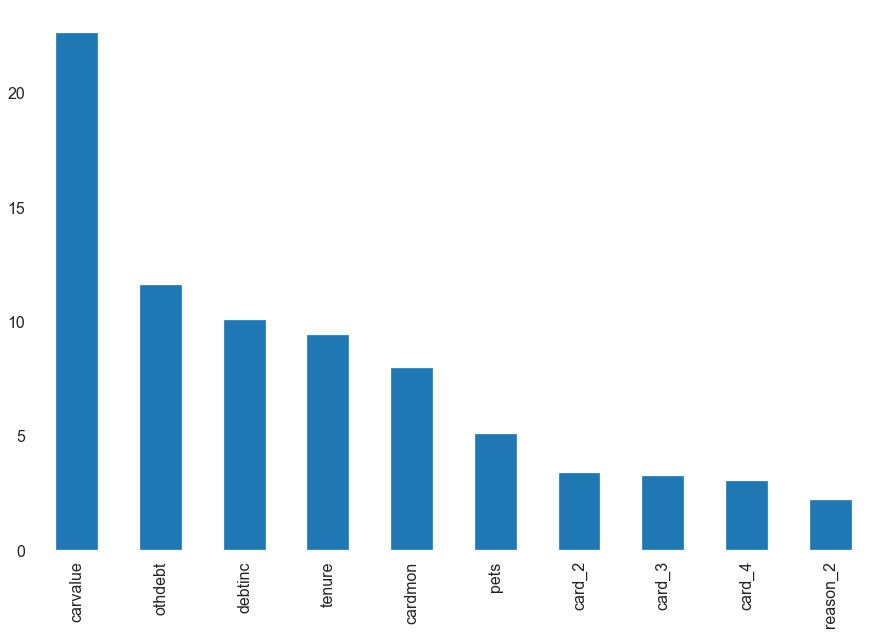

In [ ]:
cece=ce.head(12)
ce.Coefficients.plot(kind='bar',figsize=(15,10),fontsize=16)
plt.show()

# From the above analysis, we can conclude that the Credit Spend is mostly factorized by the following variables:
## Car Value
## Other Debt
## Debt Increase
## Tenure
## Calling Card last month